### 크롤러와 URL

크롤러(Crawler)는 웹페이지에 존재하는 하이퍼링크를 따라 돌아야 한다. 브라우저에서는 링크를 클릭하면 되지만 크롤러로 링크를 돌아 다니려면 URL과 관련된 기초적인 지식을 이해하고 활용해야 한다

#### URL 기초 지식

크롤러로 링크를 돌아다니려면 링크를 나타내는 a 태그의 href 속성에서 다른 페이지의 URL을 추출해야 한다. 만약 URL이 상대 URL이라면, 절대 URL로 변환해야 한다.

**URL은 Uniform Resource Locater**의 약자이다 URL 구조 정의를 RFC3986으로 살펴보자

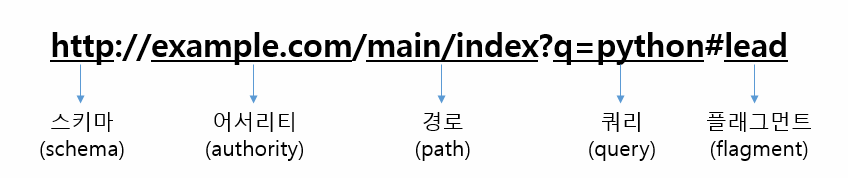

|URL구성요소|설명|
|---|---|
|스키마| http 또는 https와 같은 프로토콜을 나타낸다|
|어서리티| // 뒤에 나오는 일반적인 호스트 이름을 나타낸다. 사용자 이름, 비밀번호, 포트 번호 등을 포함하는 경우도 존재한다.|
|경로| /로 시작하는 해당 호스트 내부에서의 리소스 경로를 나타낸다.|
|쿼리|? 나오는 경로와는 다른 방법으로 리소스를 표현하는 방법이다. 존재하지 않는 경우도 있다.|
|플래그먼트|뒤에 나오는 리소스 내부의 특정 부분 등을 나타낸다. 존재하지 않는 경우도 있다.|

### 절대 URL과 상대 URL

절대 URL과 상대 URL를 정의하는 기준은 매우 다양할 수 있으나, http:// 등의 스키마로 시작하는 URL을 절대 URL이라 정의한다.


그리고 이러한 절대 URL을 기준으로 상대적인 경로를 표현하게 되는 URL을 상대 URL이라 정의한다

    * 상대 URL1 - //로 시작하는 URL

    * 상대 URL2 - /로 시작하는 URL

    * 이 밖의 형식

In [1]:
# 상대 URL을 절대 URL로 변환하기 :: urllib.parse 모듈 하의 urljoin()함수 활용

from urllib.parse import urljoin

base_url = 'http://example.com/books/top.html'

In [2]:
urljoin(base_url, '//cdn.example.com/logo.png') # //로 시작하는 url

'http://cdn.example.com/logo.png'

In [3]:
urljoin(base_url, '/articles/') # /로 시작하는 URL

'http://example.com/articles/'

In [4]:
# 파이썬으로 크롤러 만들기
# 1. Requests로 웹 페이지추출
# 2. lxml로 웹 페이지 스크레이핑
# 3. 크롤링 대상 :: 한빛 미디어의 "새로나온 책 목록"

'https://www.hanbit.co.kr/store/books/new_book_list.html' ## :: 예시를 위한 사이트

'https://www.hanbit.co.kr/store/books/new_book_list.html'

In [5]:
!pip install cssselect

In [6]:
import requests
import lxml.html

response = requests.get('https://www.hanbit.co.kr/store/books/new_book_list.html')
root = lxml.html.fromstring(response.content)
for a in root.cssselect('.view_box a'):
    url = a.get('href')
    print(url)

/store/books/look.php?p_code=B6189263297
/store/books/look.php?p_code=B6189263297
/store/books/look.php?p_code=B4813114979
javascript:;
/store/books/look.php?p_code=B4813114979
/store/books/look.php?p_code=B8806843023
javascript:;
/store/books/look.php?p_code=B8806843023
/store/books/look.php?p_code=B2859439220
/store/books/look.php?p_code=B2859439220
/store/books/look.php?p_code=B1996635146
javascript:;
/store/books/look.php?p_code=B1996635146
/store/books/look.php?p_code=B9063949643
/store/books/look.php?p_code=B9063949643
/store/books/look.php?p_code=B7400451696
/store/books/look.php?p_code=B7400451696
/store/books/look.php?p_code=B6129400746
/store/books/look.php?p_code=B6129400746
/store/books/look.php?p_code=B7738896383
/store/books/look.php?p_code=B7738896383
/store/books/look.php?p_code=B1959656080
/store/books/look.php?p_code=B1959656080
/store/books/look.php?p_code=B4354575770
javascript:;
/store/books/look.php?p_code=B4354575770
/store/books/look.php?p_code=B5171715268
/stor

    1) 위의 javascript:;라는 부분은 자바스크립트 코드를 수행하라는 의미인데, 이는 상세 페이지 이동과 전혀 관계가 없다. 따라서 이를 제외할 수 있으면 좋겠다.

    2) 또한 상대 url들을 절대 URL로 변환해야 한다. urljoin() 외에 lxml.html.HtmlElemen 클래스를 활용할 수도 있다. make_links_absolute()메서드를 활용하자.

In [7]:
import requests
import lxml.html

response = requests.get('https://www.hanbit.co.kr/store/books/new_book_list.html')
root = lxml.html.fromstring(response.content)

# 모든 링크를 절대 URL로 변환하자.
root.make_links_absolute(response.url)

for a in root.cssselect('.view_box .book_tit a'):
    url = a.get('href')
    print(url)

https://www.hanbit.co.kr/store/books/look.php?p_code=B6189263297
https://www.hanbit.co.kr/store/books/look.php?p_code=B4813114979
https://www.hanbit.co.kr/store/books/look.php?p_code=B8806843023
https://www.hanbit.co.kr/store/books/look.php?p_code=B2859439220
https://www.hanbit.co.kr/store/books/look.php?p_code=B1996635146
https://www.hanbit.co.kr/store/books/look.php?p_code=B9063949643
https://www.hanbit.co.kr/store/books/look.php?p_code=B7400451696
https://www.hanbit.co.kr/store/books/look.php?p_code=B6129400746
https://www.hanbit.co.kr/store/books/look.php?p_code=B7738896383
https://www.hanbit.co.kr/store/books/look.php?p_code=B1959656080
https://www.hanbit.co.kr/store/books/look.php?p_code=B4354575770
https://www.hanbit.co.kr/store/books/look.php?p_code=B5171715268
https://www.hanbit.co.kr/store/books/look.php?p_code=B7798657798
https://www.hanbit.co.kr/store/books/look.php?p_code=B6001875802
https://www.hanbit.co.kr/store/books/look.php?p_code=B6361762764
https://www.hanbit.co.kr/

### **세션이란?**

웹 브라우저와 서버가 HTTP 프로토콜을 통해서 하는 모든 커뮤니 케이션은 무상태(Stateless)라고 한다. Client와 Server 사이의 메세지가 완벽하게 독립적이라는 의미이다. 

세션이라는 것은 사이트와 특정 브라우저 사이의 "state"를 유지시키는 것이다. 세션이 사용자가 매 브라우저마다 임의의 데이터를 저장하게 하고, 이 데이터가 브라우저가 접속할 때마다 사이트에서 활용할 수 있도록 한다.

In [8]:
## 위의 내용들 Crawler의 사용자 정의 함수로 정의하여 생성

import requests
import lxml.html

def main():
    """
    크롤러의 메인 처리
    """

    # 여러 페이지에서 크롤링할 것이므로 Session을 사용해보자.
    session = requests.Session()
    
    # scrape_list_page()함수를 호출해서 제너레이터를 추출
    response = session.get('https://www.hanbit.co.kr/store/books/new_book_list.html')
    urls = scrape_list_page(response)
    
    # 제너레이터는 list처럼 사용할 수 있다.
    for url in urls:
        print(url)

def scrape_list_page(response):
    root = lxml.html.fromstring(response.content)
    root.make_links_absolute(response.url)
    for a in  root.cssselect('.view_box .book_tit a'):
        url = a.get('href')
        #yield 구문으로 제너레이터의 요소 반환
        yield url ##  return으로 결과값을 받아줄 수 있으나
                  ##  yield로도 결과값을 받아 줄 수 있습니다.


if __name__ == '__main__' :
    main()

https://www.hanbit.co.kr/store/books/look.php?p_code=B6189263297
https://www.hanbit.co.kr/store/books/look.php?p_code=B4813114979
https://www.hanbit.co.kr/store/books/look.php?p_code=B8806843023
https://www.hanbit.co.kr/store/books/look.php?p_code=B2859439220
https://www.hanbit.co.kr/store/books/look.php?p_code=B1996635146
https://www.hanbit.co.kr/store/books/look.php?p_code=B9063949643
https://www.hanbit.co.kr/store/books/look.php?p_code=B7400451696
https://www.hanbit.co.kr/store/books/look.php?p_code=B6129400746
https://www.hanbit.co.kr/store/books/look.php?p_code=B7738896383
https://www.hanbit.co.kr/store/books/look.php?p_code=B1959656080
https://www.hanbit.co.kr/store/books/look.php?p_code=B4354575770
https://www.hanbit.co.kr/store/books/look.php?p_code=B5171715268
https://www.hanbit.co.kr/store/books/look.php?p_code=B7798657798
https://www.hanbit.co.kr/store/books/look.php?p_code=B6001875802
https://www.hanbit.co.kr/store/books/look.php?p_code=B6361762764
https://www.hanbit.co.kr/

In [9]:
session = requests.Session()

response = session.get('https://www.hanbit.co.kr/store/books/new_book_list.html')
response

urls = scrape_list_page(response)
for url in urls:
    print(url)

https://www.hanbit.co.kr/store/books/look.php?p_code=B6189263297
https://www.hanbit.co.kr/store/books/look.php?p_code=B4813114979
https://www.hanbit.co.kr/store/books/look.php?p_code=B8806843023
https://www.hanbit.co.kr/store/books/look.php?p_code=B2859439220
https://www.hanbit.co.kr/store/books/look.php?p_code=B1996635146
https://www.hanbit.co.kr/store/books/look.php?p_code=B9063949643
https://www.hanbit.co.kr/store/books/look.php?p_code=B7400451696
https://www.hanbit.co.kr/store/books/look.php?p_code=B6129400746
https://www.hanbit.co.kr/store/books/look.php?p_code=B7738896383
https://www.hanbit.co.kr/store/books/look.php?p_code=B1959656080
https://www.hanbit.co.kr/store/books/look.php?p_code=B4354575770
https://www.hanbit.co.kr/store/books/look.php?p_code=B5171715268
https://www.hanbit.co.kr/store/books/look.php?p_code=B7798657798
https://www.hanbit.co.kr/store/books/look.php?p_code=B6001875802
https://www.hanbit.co.kr/store/books/look.php?p_code=B6361762764
https://www.hanbit.co.kr/

### **상세 페이지에서 스크레이핑**

In [10]:
import requests
import lxml.html
## 위의 내용들 Crawler의 사용자 정의 함수로 정의하여 생성

import requests
import lxml.html

def main():
    """
    크롤러의 메인 처리
    """

    # 여러 페이지에서 크롤링할 것이므로 Session을 사용해보자.
    session = requests.Session()
    
    # scrape_list_page()함수를 호출해서 제너레이터를 추출
    response = session.get('https://www.hanbit.co.kr/store/books/new_book_list.html')
    urls = scrape_list_page(response)
    
    # 제너레이터는 list처럼 사용할 수 있다.
    for url in urls:
        print(url)

def scrape_list_page(response):
    root = lxml.html.fromstring(response.content)
    root.make_links_absolute(response.url)
    for a in  root.cssselect('.view_box .book_tit a'):
        url = a.get('href')
        #yield 구문으로 제너레이터의 요소 반환
        yield url ##  return으로 결과값을 받아줄 수 있으나
                  ##  yield로도 결과값을 받아 줄 수 있습니다.

def scrape_detail_page(response):
    
    '''
    상세 페이지의 Response에서 책 정보를 dict로 추출한다
    '''

    root = lxml.html.fromstring(response.content)
    ebook = {
        'url':response.url,
        'title':root.cssselect('.store_product_info_box h3')[0].text_content(),
        'price':root.cssselect('.pbr strong')[0].text_content(),
        'content':[p.text_content()\
                   for p in root.cssselect('#tabs_3.hanbit_edit_view p')]
    }
    return ebook


if __name__ == '__main__' :
    main()

https://www.hanbit.co.kr/store/books/look.php?p_code=B6189263297
https://www.hanbit.co.kr/store/books/look.php?p_code=B4813114979
https://www.hanbit.co.kr/store/books/look.php?p_code=B8806843023
https://www.hanbit.co.kr/store/books/look.php?p_code=B2859439220
https://www.hanbit.co.kr/store/books/look.php?p_code=B1996635146
https://www.hanbit.co.kr/store/books/look.php?p_code=B9063949643
https://www.hanbit.co.kr/store/books/look.php?p_code=B7400451696
https://www.hanbit.co.kr/store/books/look.php?p_code=B6129400746
https://www.hanbit.co.kr/store/books/look.php?p_code=B7738896383
https://www.hanbit.co.kr/store/books/look.php?p_code=B1959656080
https://www.hanbit.co.kr/store/books/look.php?p_code=B4354575770
https://www.hanbit.co.kr/store/books/look.php?p_code=B5171715268
https://www.hanbit.co.kr/store/books/look.php?p_code=B7798657798
https://www.hanbit.co.kr/store/books/look.php?p_code=B6001875802
https://www.hanbit.co.kr/store/books/look.php?p_code=B6361762764
https://www.hanbit.co.kr/

In [11]:
# end of file - 한빛출판사